In [1]:
import matplotlib.pyplot as plt
import numpy as np
from math import pi

In [2]:
pH = np.linspace(3.5, 8.5, 100)

In [3]:
def Inatomi(pHv):
    return 47.59*np.exp(-1.345*pHv)

def VMartin(pHv):
    return 721.86*np.exp(-2.387*pHv)

fn2o_Inotomi = Inatomi(pH)
fn2o_VMartin = VMartin(pH)

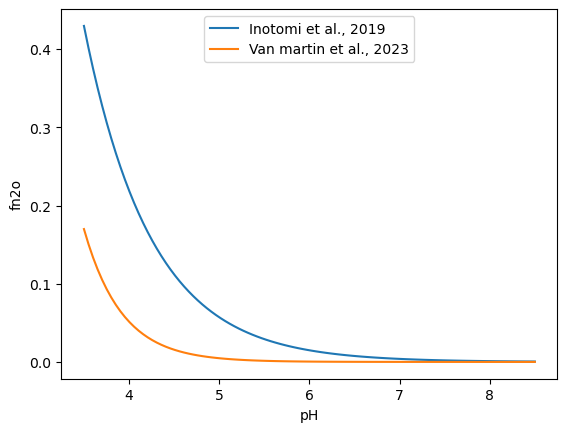

In [4]:
plt.plot(pH, fn2o_Inotomi, label="Inotomi et al., 2019")
plt.plot(pH, fn2o_VMartin, label="Van martin et al., 2023")
plt.legend(loc='upper center')
plt.xlabel("pH")
plt.ylabel("fn2o")
plt.show()

In [5]:
AFPS = 1 - np.linspace(0.2, 0.8, 100)
DDo = 0.209*(AFPS)**(4/3)

In [6]:
def RNON2O(var, Dr):
    result = 15.2 + 35.5*np.arctan(var*3.1415*(10*Dr-1.86))/3.1415
    return result

VMartin = RNON2O(0.75, DDo)
Parton = RNON2O(0.68, DDo)

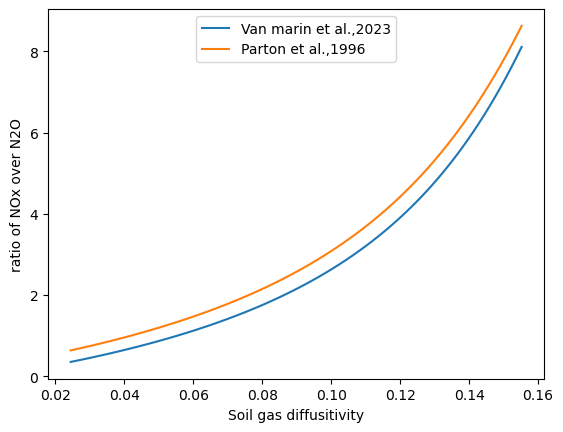

In [7]:
plt.plot(DDo, VMartin, label="Van marin et al.,2023")
plt.plot(DDo, Parton, label="Parton et al.,1996")
plt.legend(loc="upper center")
plt.xlabel("Soil gas diffusitivity")
plt.ylabel("ratio of NOx over N2O")
plt.show()

In [8]:
wsat = 0.8
w = np.linspace(0.1, 0.7, 100)
VMartin = 0.209*(1-w/wsat)**(4/3)
vira = (abs(w - wsat))**(10/3)/(wsat**2)

omfrac = 0.6
CLM_new = omfrac*(wsat-w)**(10/3)/(wsat**2) + (1-omfrac)*(wsat-w)**2 * (1-w/wsat)**(4/3)
CLM_type_error = omfrac*(1-w/wsat)**(10/3)/(wsat**2) + (1-omfrac)*(wsat-w)**2 * (1-w/wsat)**(4/3)
CLM_original = (omfrac*(1-w/wsat)**(10/3)/(wsat**2) + (1-omfrac)*(wsat-w)**2 * (1-w/wsat)**(4/3))*(0.1759+0.0011*293)*1e-4
T = 0.1759 + 0.0011*283

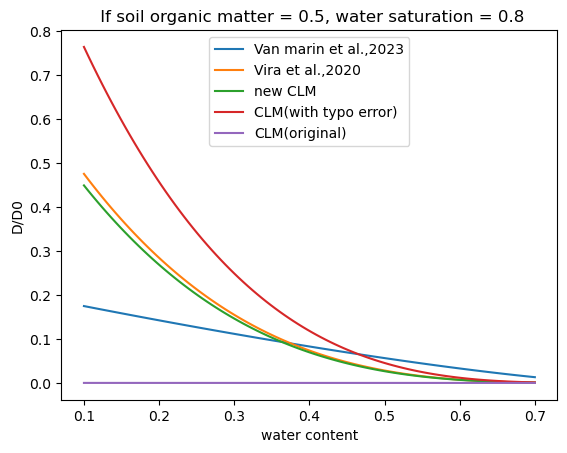

In [9]:
plt.plot(w, VMartin, label="Van marin et al.,2023")
plt.plot(w, vira, label="Vira et al.,2020")
plt.plot(w, CLM_new, label="new CLM")
plt.plot(w, CLM_type_error, label="CLM(with typo error)")
plt.plot(w, CLM_original, label="CLM(original)")
plt.legend(loc="upper center")
plt.xlabel("water content")
plt.ylabel("D/D0")
plt.title(" If soil organic matter = 0.5, water saturation = 0.8")
plt.show()

In [10]:
rnox = 15.2 + (35.5*np.arctan(0.68*pi*(10*CLM_new - 1.86)))/pi

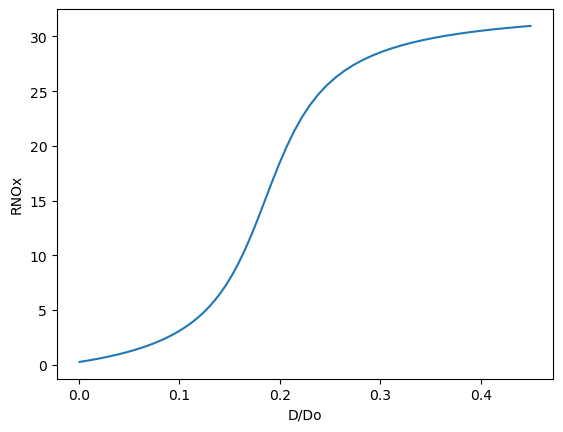

In [11]:
plt.plot(CLM_new, rnox, label="RNOx")
plt.xlabel("D/Do")
plt.ylabel("RNOx")
plt.show()